In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset --unzip

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 44.2MB/s]


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn import preprocessing


#Loading the dataset

In [ ]:

# Loading the dataset
df = pd.read_csv("/content/spam.csv",encoding='latin-1')


In [ ]:
# Displaying the first few rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


99% of records in the last 3 columns are null values so i will drop them  

In [ ]:
null_val2 = df['Unnamed: 2'].isnull().sum()
print((null_val2/len(df))*100)
null_val3 = df['Unnamed: 3'].isnull().sum()
print((null_val3/len(df))*100)
null_val4 = df['Unnamed: 4'].isnull().sum()
print((null_val4/len(df))*100)

99.10265613783201
99.78463747307968
99.89231873653985


In [ ]:
# 'When inplace=True, the drop() method removes the specified columns
#  from the DataFrame and updates the DataFrame
#  in memory without creating a new DataFrame'
droped_columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4' ]
df.drop(columns=droped_columns, inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


there's no null values now

In [ ]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()
#v1 : label (spam or ham)
#v2 : message

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**rename columns to be readable**

In [ ]:
df.rename(columns = {'v1': 'label' , 'v2':'Email'}, inplace=True)

In [ ]:
df.columns

Index(['label', 'Email'], dtype='object')

##visualize the occurrence of two labels in a dataset

Index(['ham', 'spam'], dtype='object') [4825  747]


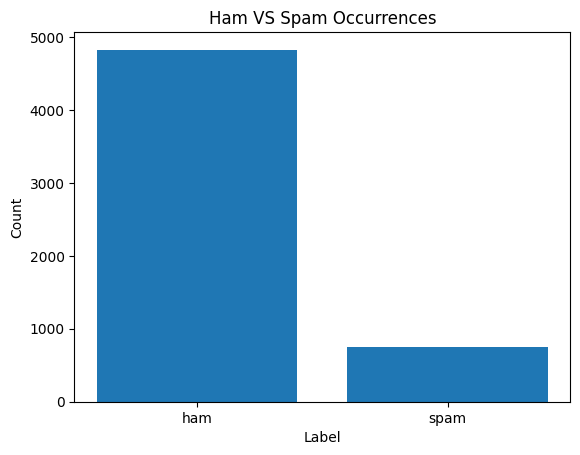

In [ ]:
# Calculate the occurrence of each label
label_counts = df['label'].value_counts()
# print(label_counts)

# Get the labels and their corresponding counts
labels = label_counts.index
counts = label_counts.values
print(labels, counts)

# Create a bar graph
plt.bar(labels, counts)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Ham VS Spam Occurrences')

# Show the bar graph
plt.show()

Note :**Dataset is imbalanced**

**Label Encoding**

label_encoder object knows how to understand word labels.

**ham : 0**

**spam :1**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Y']= label_encoder.fit_transform(df['label'])
df['Y'].unique()


array([0, 1])

In [ ]:
df.head()

,label,Email,Y
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#Text Processing
Building a machine learning model requires the preprocessing of data, and the quality of the preprocessing determines the model’s performance.

Where preprocessing text is the initial stage in NLP’s model-building process.

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


##1.Remove Punctuation.2.Tokenization,3.Removing Stopwords

there are many ways but i choosed 'Remove Punctuation from a text with Translate'
This is one of the best ways to strip punctuation from a string according to geeksforgeeks

https://www.geeksforgeeks.org/python-remove-punctuation-from-string/

4.Remove all characters other than alphabets

5.Part of Speech Tagging

6.Lemmatization

In [ ]:
# Function to remove punctuations.
def remove_punc(text):
  nonP_text = text.translate(str.maketrans('', '', string.punctuation))
  # nonP_text = "".join([char for char in text if char not in string.punctuation])
  return nonP_text

In [ ]:
df.head()

,label,Email,Y
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Problem & it's solve**

Note i will use TweetTokenizer instead of word_tokenize that recognizes and preserves contractions as single tokens.

using word_tokenize:

gonna >> gon , na

cant >> ca , nt

to avoid this i used TweetTokenizer


/////////////it isn't done ////////////

**Problem & it's solve**

after avoiding word_tokenizer that divide some words
when i use Spacy pos tagger , i faced the same problem
so , i will fix this problem by ::

Replacing the contractions in the text with their expanded forms before performing POS tagging. This way, the POS tagger will treat each word individually without splitting the contractions.


**prefered to use this way before removing punctuation**

//////////////////////

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()


In [ ]:
# Function to clean text
def text_processing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = remove_punc(text)

    # Tokenize text (split into words)
    # words = nltk.word_tokenize(text)
    words = tokenizer.tokenize(text)
    # print('wordsTokanized: ', words)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # print('Remove stopwords : ', words)

    #POS Tagging

    # Join words back into text
    cleaned_text = ' '.join(words)

    return cleaned_text


In [ ]:
print('original text:' , df['Email'][60])
ct = text_processing(df['Email'][60])
print(ct)

original text: Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me.
gonna pick 1 burger way home cant even move pain killing


In [ ]:
# Apply the text processing steps to the 'Email Column'
df['Clean_Email'] = df['Email'].apply(lambda x: text_processing(x))


In [ ]:
print(df.head())

  label                                              Email  Y  \
0   ham  Go until jurong point, crazy.. Available only ...  0   
1   ham                      Ok lar... Joking wif u oni...  0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  1   
3   ham  U dun say so early hor... U c already then say...  0   
4   ham  Nah I don't think he goes to usf, he lives aro...  0   

                                         Clean_Email  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


##4.Remove all characters other than alphabets

In [ ]:
def RemoveSpecialCharacter_and_numericals(text):
  # new_text = re.sub('[\W_]+', ' ', text)
  new_text = re.sub('[^A-Za-z]+', ' ', str(text))
  return new_text

In [ ]:
df['Clean_Email'][60]

'gonna pick 1 burger way home cant even move pain killing'

In [ ]:
RemoveSpecialCharacter_and_numericals(df['Clean_Email'][60])

'gonna pick burger way home cant even move pain killing'

In [ ]:
df['Clean_Email'] = df['Clean_Email'].apply(lambda x: RemoveSpecialCharacter_and_numericals(x))


In [ ]:
df.head()

,label,Email,Y,Clean_Email
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


##Part of Speech Tagging

There are two main types of part-of-speech (POS) tagging in natural language processing (NLP):

1-Rule-based POS tagging

2-Statistical POS tagging

I will use Statistical POS tagging as it's more accurate than rule-based taggers accourding to:
https://spotintelligence.com/2023/01/24/pos-tagging-in-nlp-python/#Types_of_POS_tagging_in_NLP


**The spaCy library’s** POS tagger is based on a statistical model trained on the OntoNotes 5 corpus, and it can tag the text with high accuracy. It also can tag other features, like lemma, dependency, ner, etc.

In [ ]:
!python -m spacy download en_core_web_sm

2023-10-28 20:32:56.164920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 20:32:56.164984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 20:32:56.165030: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 20:32:56.175255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-28 20:32:57.389704: W tensorflow/compiler/

In [ ]:
import spacy

In [ ]:
df['Clean_Email'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
# Load the 'en_core_web_sm' model
Spacy_loaded = spacy.load('en_core_web_sm')
# Process the sentence using spaCy's NLP pipeline
Taggs = Spacy_loaded(df['Clean_Email'][0])
print(Taggs)
list_tags = []
for token in Taggs:
  if token.text.lower() not in set(stopwords.words('english')):
    list_tags.append(tuple([token.text, token.pos_]))
list_tags

go jurong point crazy available bugis n great world la e buffet cine got amore wat


[('go', 'VERB'),
 ('jurong', 'ADV'),
 ('point', 'NOUN'),
 ('crazy', 'ADJ'),
 ('available', 'ADJ'),
 ('bugis', 'PROPN'),
 ('n', 'CCONJ'),
 ('great', 'ADJ'),
 ('world', 'NOUN'),
 ('la', 'PROPN'),
 ('e', 'PROPN'),
 ('buffet', 'PROPN'),
 ('cine', 'PROPN'),
 ('got', 'VERB'),
 ('amore', 'PROPN'),
 ('wat', 'NOUN')]

In [ ]:
# Load the 'en_core_web_sm' model
Spacy_loaded = spacy.load('en_core_web_sm')
def POS_tagging(text):
  # Process the sentence using spaCy's NLP pipeline
  Taggs = Spacy_loaded(text)
  list_tags = []

  for token in Taggs:
    if token.text.lower() not in set(stopwords.words('english')):
      list_tags.append(tuple([token.text, token.pos_]))
  return list_tags



In [ ]:
df['POS tagged'] = df['Clean_Email'].apply(lambda x : POS_tagging(x))

In [ ]:
df.head()

,label,Email,Y,Clean_Email,POS tagged
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,"[(go, VERB), (jurong, ADV), (point, NOUN), (cr..."
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[(ok, INTJ), (lar, ADJ), (joking, VERB), (wif,..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...,"[(free, ADJ), (entry, NOUN), (wkly, ADJ), (com..."
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,"[(u, PROPN), (dun, PROPN), (say, VERB), (early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though,"[(nah, INTJ), (nt, PART), (think, VERB), (goes..."


##Lemmatization

Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good.  

lemmatization is more accurate than stemming if you’re dealing with an NLP applications that understand the meaning of the dialogue , so i will use it.

this is accourding to : https://builtin.com/machine-learning/lemmatization


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


In [ ]:
def map_spacy_pos_to_wordnet_pos(spacy_pos):
    if spacy_pos.startswith('VERB'):
        return 'v'  # Verb
    elif spacy_pos.startswith('NOUN') or spacy_pos == 'PROPN':
        return 'n'  # Noun
    elif spacy_pos.startswith('ADJ'):
        return 'a'  # Adjective
    elif spacy_pos.startswith('ADV'):
        return 'r'  # Adverb
    else:
        return 'n' # Default to noun if not found

In [ ]:
def _Lemma(PosTaggingList_of_sentance):
  lemma_text = ""
  for word , tag in PosTaggingList_of_sentance:
    tag = map_spacy_pos_to_wordnet_pos(tag)
    # print('word = ', word, 'tag = ', tag)
    lemma = wordnet_lemmatizer.lemmatize(word, pos=tag)
    lemma_text += lemma + " "
    # print(lemma_text)

  return lemma_text


In [ ]:
print(df['Email'][60])
print(df['Clean_Email'][60])
print(df['POS tagged'][60])
lem= _Lemma(df['POS tagged'][60])
print(lem)



Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me.
gonna pick burger way home cant even move pain killing
[('gon', 'VERB'), ('na', 'PART'), ('pick', 'VERB'), ('burger', 'NOUN'), ('way', 'NOUN'), ('home', 'NOUN'), ('ca', 'AUX'), ('nt', 'PART'), ('even', 'ADV'), ('move', 'VERB'), ('pain', 'NOUN'), ('killing', 'NOUN')]
gon na pick burger way home ca nt even move pain killing 


In [ ]:
df['lemma'] = df['POS tagged'].apply(lambda x : _Lemma(x))

In [ ]:
df.head()

,label,Email,Y,Clean_Email,POS tagged,lemma
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,"[(go, VERB), (jurong, ADV), (point, NOUN), (cr...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[(ok, INTJ), (lar, ADJ), (joking, VERB), (wif,...",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...,"[(free, ADJ), (entry, NOUN), (wkly, ADJ), (com...",free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,"[(u, PROPN), (dun, PROPN), (say, VERB), (early...",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though,"[(nah, INTJ), (nt, PART), (think, VERB), (goes...",nah nt think go usf live around though


#Loud Words in Spam Email

generate a word cloud visualization based on the provided text data, where more frequently occurring words are displayed in larger font sizes.



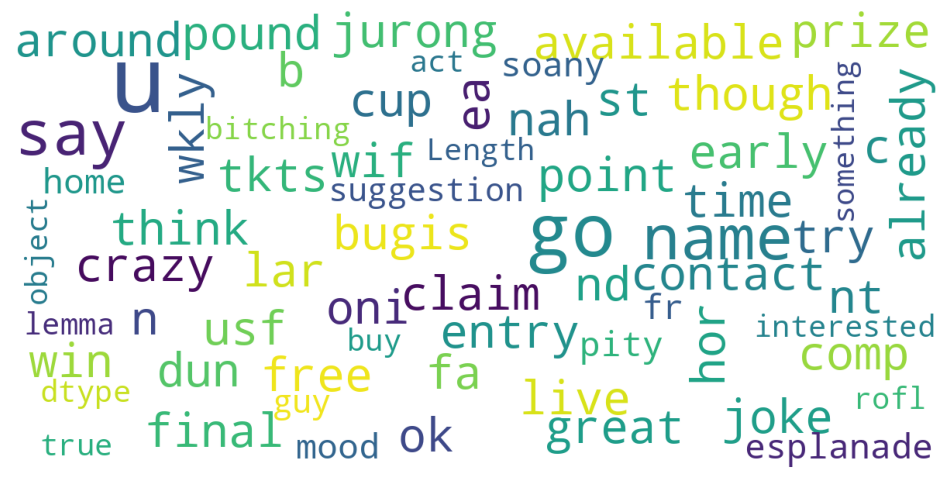

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

df_lemma = df.lemma
show_wordcloud(df_lemma)

#Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df['lemma']
y = df['Y']

In [ ]:
type(y[0])

numpy.int64

In [ ]:
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3900,)
Number transactions y_train dataset:  (3900,)
Number transactions X_test dataset:  (1672,)
Number transactions y_test dataset:  (1672,)


# Feature Extraction

Is the process of transforming the raw text into a numerical representation that can be processed by computers.

##**TF-IDF**

It is primarily used to measure the importance of a term within a document or a corpus of documents. While TF-IDF is often applied at the lexical level, it is not limited to it and can be used at different levels of analysis.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
print(X_train.shape)
print(X_test.shape)

(3900,)
(1672,)


In [ ]:
'this code is not right'
# # get tf-df values
# x_train_features = TF_IDF.fit_transform(X_train)
# x_test_features =  TF_IDF.fit_transform(X_test)


'this code is not right'

**make sure that ::**

 After fitting the vectorizer on the training data, you need to apply the **same transformation to the test data using the transform method** of the vectorizer. This will ensure that the test data is represented using the same features as the training data.

In [ ]:
# Create a TF-IDF vectorizer and fit it on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the trained vectorizer
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(3900, 5912)
(1672, 5912)


In [ ]:
print(print(X_train_tfidf[0]))

  (0, 192)	0.5058721277396868
  (0, 1488)	0.4819545322210031
  (0, 4958)	0.5058721277396868
  (0, 3033)	0.5058721277396868
None


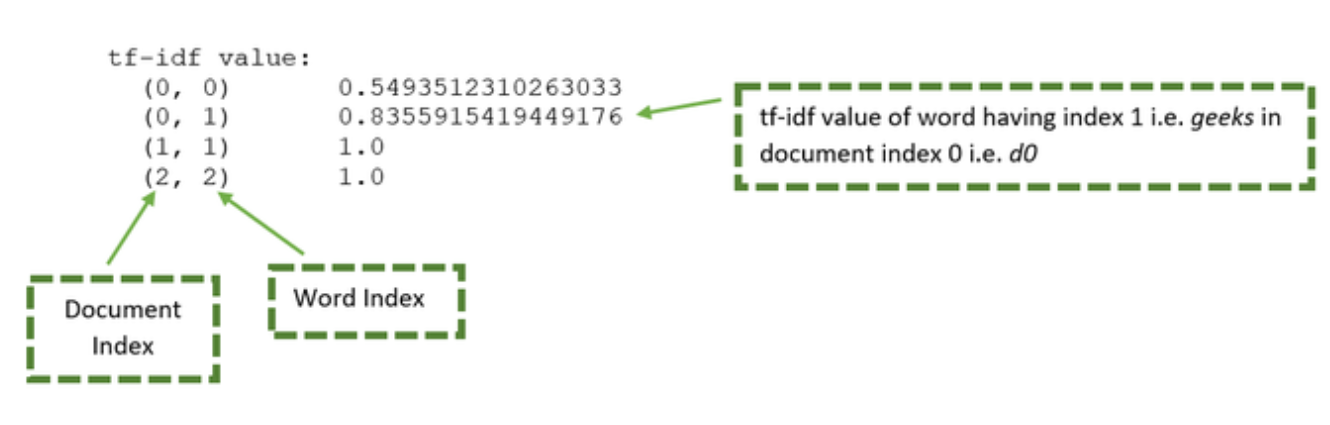

#Balancing the Dataset using SMOTE algorithm



In [ ]:
print((y_train==0).sum())
print((y_train==1).sum())

print((y_test==0).sum())
print((y_test==1).sum())
print('-------------------------------')
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

3391
509
1434
238
-------------------------------
3900
3900
1672
1672


I chose to use **SMOTE algorithm**
where it is an oversampling method to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.


The SMOTE algorithm requires numerical input, so i used tf-idf results

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 40)
X_train_res, y_train_res = sm.fit_resample(X_train_tfidf, y_train.ravel())

In [ ]:
X_train_res.shape

(6782, 5912)

In [ ]:
y_train_res.shape

(6782,)

In [ ]:
print((y_train_res == 1).sum())
print((y_train_res == 0).sum())

3391
3391


Now you can see that training data is balanced.

it is not necessary to balance the test data as well.

The purpose of balancing the training data is to help the model learn from both classes more effectively and avoid biases towards the majority class. By oversampling the minority class.

# Models Development

In [ ]:
Accu_imbal = []
Accu_bal = []


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##Random Forest classifier

###balanced dataset

In [ ]:
X_train_res.shape

(6782, 5912)

In [ ]:
y_train_res.shape

(6782,)

In [ ]:
X_train_tfidf.shape

(3900, 5912)

In [ ]:
X_test_tfidf.shape

(1672, 5912)

In [ ]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data
y_train_pred = rf_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test_tfidf)


####Model Evaluation

In [ ]:
y_train_pred[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [ ]:
#testing prediction
tst_accuracy = accuracy_score(y_test , y_test_pred)
print('test accuracy (Balanced Data): ' , tst_accuracy)

test accuracy (Balanced Data):  0.97188995215311


'TN , FP'

'FN , TP'

'TN: correctly predicted as the negative class'

'FP: incorrectly predicted as the positive class'

'FN: incorrectly predicted as the negative class'

'TP: correctly predicted as the positive class'

In [ ]:
confusion_matrix(y_test, y_test_pred)


array([[1434,    0],
       [  47,  191]])

In [ ]:
from sklearn.metrics import f1_score


###imbalanced data

In [ ]:
# Create a Random Forest Classifier object
rf_classifier_imbal = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the imbalanced training data
y_train_pred_imbal = rf_classifier_imbal.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_test_pred_imbal = rf_classifier_imbal.predict(X_test_tfidf)

####Model Evaluation

In [ ]:
y_train.shape

(3900,)

In [ ]:
y_test_pred_imbal.shape

(1672,)

In [ ]:
#testing prediction
tst_accuracy_imbal = accuracy_score(y_test , y_test_pred_imbal)
print('test accuracy(ImBalanced Data): ' , tst_accuracy_imbal)

test accuracy(ImBalanced Data):  0.9677033492822966


0.8726415094339623

### Balanced VS. Imbalanced

In [ ]:
Accu_bal.append(tst_accuracy)
Accu_imbal.append(tst_accuracy_imbal)


In [ ]:
print('test accuracy(ImBalanced Data): ' , tst_accuracy_imbal)
print('test accuracy (Balanced Data):  ' , tst_accuracy)

test accuracy(ImBalanced Data):  0.9677033492822966
test accuracy (Balanced Data):   0.97188995215311


In [ ]:
print('Imbalanced : \n',classification_report(y_test,y_test_pred_imbal))

Imbalanced : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       0.99      0.78      0.87       238

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
print('Balanced : \n',classification_report(y_test,y_test_pred))

Balanced : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1434
           1       1.00      0.80      0.89       238

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
print('f1 score balanced data: ', f1_score(y_test, y_test_pred))
print ('f1 score imbalanced data: ' ,f1_score(y_test , y_test_pred_imbal))

f1 score balanced data:  0.8904428904428905
f1 score imbalanced data:  0.8726415094339623


##LogisticRegression

###Balanced dataset

In [ ]:
# create logistic regression object
reg = LogisticRegression()

# train the model using the training sets
y_train_pred_LR = reg.fit(X_train_res, y_train_res)

# making predictions on the testing set
y_test_pred_LR = reg.predict(X_test_tfidf)

####Model Evaluation

In [ ]:
#testing prediction
tst_accuracy_LR = accuracy_score(y_test , y_test_pred_LR)
print('test accuracy (Balanced Data): ' , tst_accuracy_LR)

test accuracy (Balanced Data):  0.9748803827751196


In [ ]:
confusion_matrix(y_test, y_test_pred_LR)


array([[1417,   17],
       [  25,  213]])

###Imbalanced dataset

In [ ]:
# create logistic regression object
reg_Imbal = LogisticRegression()

# train the model using the training sets
y_train_pred_LR_Imbal = reg_Imbal.fit(X_train_tfidf, y_train)

# making predictions on the testing set
y_test_pred_LR_Imbal = reg_Imbal.predict(X_test_tfidf)



####Model Evaluation

In [ ]:
#testing prediction
tst_accuracy_LR_Imbal = accuracy_score(y_test , y_test_pred_LR_Imbal)
print('test accuracy (ImBalanced Data): ' , tst_accuracy_LR_Imbal)

test accuracy (ImBalanced Data):  0.9563397129186603


In [ ]:
confusion_matrix(y_test, y_test_pred_LR_Imbal)

array([[1430,    4],
       [  69,  169]])

###Balanced vs Imbalanced

In [ ]:
Accu_bal.append(tst_accuracy_LR)
Accu_imbal.append(tst_accuracy_LR_Imbal)

In [ ]:
print('test accuracy LR (ImBalanced Data): ' , tst_accuracy_LR_Imbal)
print('test accuracy LR (Balanced Data):   ' , tst_accuracy_LR)

test accuracy LR (ImBalanced Data):  0.9563397129186603
test accuracy LR (Balanced Data):    0.9748803827751196


In [ ]:
print('f1 score balanced data: ', f1_score(y_test,y_test_pred_LR))
print ('f1 score imbalanced data: ' ,f1_score(y_test , y_test_pred_LR_Imbal))

f1 score balanced data:  0.9102564102564102
f1 score imbalanced data:  0.8223844282238444


In [ ]:
print('Imbalanced : \n',classification_report(y_test,y_test_pred_LR_Imbal))

Imbalanced : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1434
           1       0.98      0.71      0.82       238

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [ ]:
print('balanced : \n',classification_report(y_test,y_test_pred_LR))

balanced : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1434
           1       0.93      0.89      0.91       238

    accuracy                           0.97      1672
   macro avg       0.95      0.94      0.95      1672
weighted avg       0.97      0.97      0.97      1672



##SVM

In [ ]:
from sklearn.svm import SVC

###Balanced

In [ ]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
y_tr_pred_SVM =svm.fit(X_train_res, y_train_res)

# making predictions on the testing set
y_test_pred_SVM = svm.predict(X_test_tfidf)

####Model Evaluation

In [ ]:
#testing prediction
tst_accuracy_SVM = accuracy_score(y_test , y_test_pred_SVM)
print('test accuracy SVM (Balanced Data): ' , tst_accuracy_SVM)

test accuracy SVM (Balanced Data):  0.9748803827751196


In [ ]:
confusion_matrix(y_test, y_test_pred_SVM)

array([[1419,   15],
       [  27,  211]])

###Imbalanced

In [ ]:
#Build the model
svm_ = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
y_tr_pred_SVM_Imbal =svm_.fit(X_train_tfidf, y_train)

# making predictions on the testing set
y_test_pred_SVM_Imbal = svm_.predict(X_test_tfidf)

####Model Evaluation

In [ ]:
#testing prediction
tst_accuracy_SVM_Imbal = accuracy_score(y_test , y_test_pred_SVM_Imbal)
print('test accuracy SVM (ImBalanced Data): ' , tst_accuracy_SVM_Imbal)

test accuracy SVM (ImBalanced Data):  0.9736842105263158


In [ ]:
confusion_matrix(y_test, y_test_pred_SVM_Imbal)

array([[1430,    4],
       [  40,  198]])

###Balanced VS. Imbalanced

In [ ]:
Accu_bal.append(tst_accuracy_SVM)
Accu_imbal.append(tst_accuracy_SVM_Imbal)

In [ ]:
print('test accuracy SVM (Balanced Data):   ' , tst_accuracy_SVM)
print('test accuracy SVM (ImBalanced Data): ' , tst_accuracy_SVM_Imbal)

test accuracy SVM (Balanced Data):    0.9748803827751196
test accuracy SVM (ImBalanced Data):  0.9736842105263158


In [ ]:
print('f1 score balanced data: ', f1_score(y_test, y_test_pred_SVM))
print ('f1 score imbalanced data: ' ,f1_score(y_test, y_test_pred_SVM_Imbal))

f1 score balanced data:  0.9094827586206897
f1 score imbalanced data:  0.9


In [ ]:
print('Balanced : \n',classification_report(y_test,y_test_pred_SVM))

Balanced : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1434
           1       0.93      0.89      0.91       238

    accuracy                           0.97      1672
   macro avg       0.96      0.94      0.95      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
print('Imbalanced : \n',classification_report(y_test,y_test_pred_SVM_Imbal))

Imbalanced : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1434
           1       0.98      0.83      0.90       238

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672



# Conclusion

In [ ]:
model_labels = [ 'Random Forest','Logistic Regression', 'SVM']
data = list(zip(Accu_bal, Accu_imbal))

ACC_df = pd.DataFrame(data, index = model_labels, columns = [ 'Balanced Accuracy', 'Imbalanced Accuracy'])

print(ACC_df)

                     Balanced Accuracy  Imbalanced Accuracy
Random Forest                  0.97189             0.967703
Logistic Regression            0.97488             0.956340
SVM                            0.97488             0.973684


**The Support Vector Machine (SVM) model**

demonstrated exceptional performance on both the imbalanced and balanced datasets, achieving an impressive accuracy rate of approximately 97%.

**Balanced dataset Vs. Imbalanced dataset**

When comparing imbalanced and balanced datasets in the context of model training, it was observed that all the models showed improvement when trained with the balanced dataset. However, the extent of improvement varied among the models.


It's worth noting that while all the models improved with the balanced dataset, the amount of improvement differed. Some models showed a larger boost in performance compared to others like Logistic Regression model. This variation implies that the impact of balancing the dataset may depend on the specific characteristics of the models and the data being used.

**Prioritizing higher precision over recall**

In our scenario of classifying spam and ham SMS messages, prioritizing higher precision over recall is important. High precision models have a lower chance of misclassifying ham messages as spam, even though they may occasionally classify spam as ham. This prevents the loss of valuable information from important ham messages, outweighing the risk of misclassifying some spam messages.